In [39]:
library(reshape2)
library(Biostrings)
library(ggplot2)

In [46]:

## glycodistance
#glyco_d=read.csv(file='annotation/03_Regressions_MutualInformation/glyco_impact.csv')[,-c(1,4,5,6,8)]
#glyco_d_thresh = 20

glyco_d = read.csv('annotation/03_Regressions_MutualInformation/glyco_impact.0.5.csv')[,-c(1,4,5,6,8)]
glyco_d_thresh = 2.5

colnames(glyco_d)[3] = 'glyco_d' # significant effects
glyco_d = rbind(glyco_d,glyco_d[,c(2,1,3,4)])
head(glyco_d)

## get substitution matrix
data(BLOSUM45)
data(BLOSUM50)
data(BLOSUM62)
data(BLOSUM80)
data(BLOSUM100)
data(PAM30)
data(PAM40)
data(PAM70)
data(PAM120)
data(PAM250)
sub_mats = list(BLOSUM45,BLOSUM50,BLOSUM62,BLOSUM80,BLOSUM100,PAM30,PAM40,PAM70,PAM120,PAM250)
names(sub_mats) = c('BLOSUM_45','BLOSUM_50','BLOSUM_62','BLOSUM_80','BLOSUM_100','PAM_30','PAM_40','PAM_70','PAM_120','PAM_250')
subst_d<-melt(sub_mats)
colnames(subst_d)[3] = 'subst_d'
subst_d = cbind(subst_d,do.call(rbind,strsplit(as.character(subst_d$L1),'_')))
colnames(subst_d)[5:6] = c('matrix_type','matrix_value')
subst_d$matrix_value = as.numeric(as.character(subst_d$matrix_value))
head(subst_d)

Var1,Var2,glyco_d,v2_type
<fct>,<fct>,<dbl>,<fct>
A,A,-1.612986,aa
A,A,-1.965403,aaAll
A,A,-1.894244,aaUp
A,A,-1.868695,aaDown
A,C,6.453256,aaDown
A,C,3.955802,aaAll


Var1,Var2,subst_d,L1,matrix_type,matrix_value
<fct>,<fct>,<int>,<chr>,<fct>,<dbl>
A,A,5,BLOSUM_45,BLOSUM,45
R,A,-2,BLOSUM_45,BLOSUM,45
N,A,-1,BLOSUM_45,BLOSUM,45
D,A,-2,BLOSUM_45,BLOSUM,45
C,A,-1,BLOSUM_45,BLOSUM,45
Q,A,-1,BLOSUM_45,BLOSUM,45


In [47]:
dim(glyco_d)
dim(subst_d)

m<-merge(glyco_d,subst_d)
dim(m)

head(m)
sort(unique(m$L1))

[1] 2060    4

[1] 6005    6

[1] 20600     8

Var1,Var2,glyco_d,v2_type,subst_d,L1,matrix_type,matrix_value
<fct>,<fct>,<dbl>,<fct>,<int>,<chr>,<fct>,<dbl>
A,A,-1.612986,aa,2,PAM_250,PAM,250
A,A,-1.612986,aa,8,BLOSUM_100,BLOSUM,100
A,A,-1.612986,aa,6,PAM_30,PAM,30
A,A,-1.612986,aa,5,BLOSUM_80,BLOSUM,80
A,A,-1.612986,aa,5,PAM_70,PAM,70
A,A,-1.612986,aa,5,BLOSUM_50,BLOSUM,50


[1] "BLOSUM_100" "BLOSUM_45"  "BLOSUM_50"  "BLOSUM_62"  "BLOSUM_80" 
 [6] "PAM_120"    "PAM_250"    "PAM_30"     "PAM_40"     "PAM_70"

`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


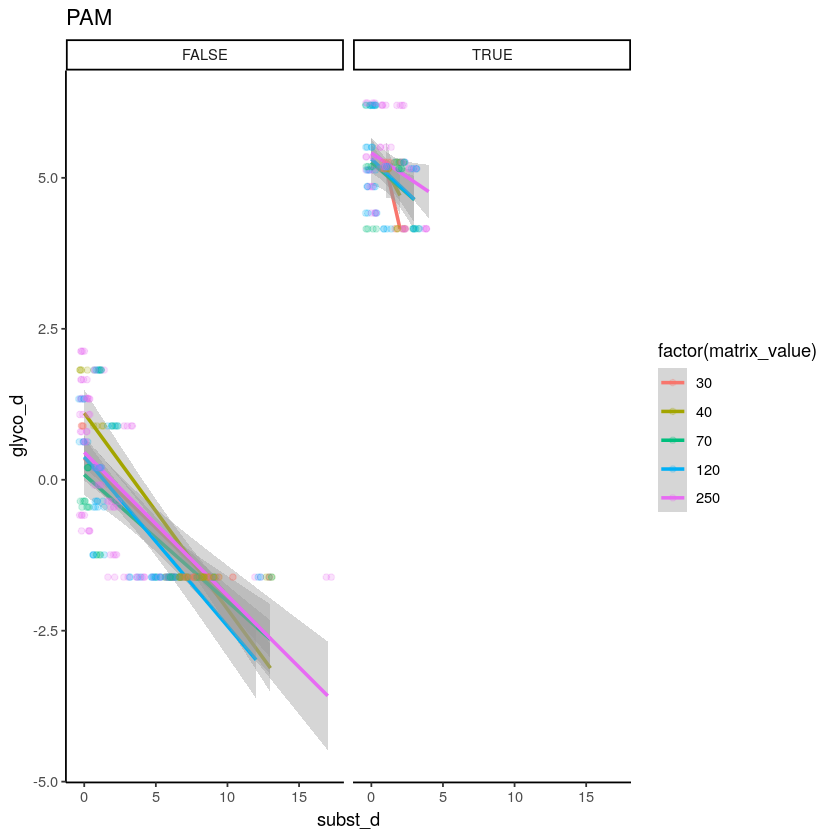

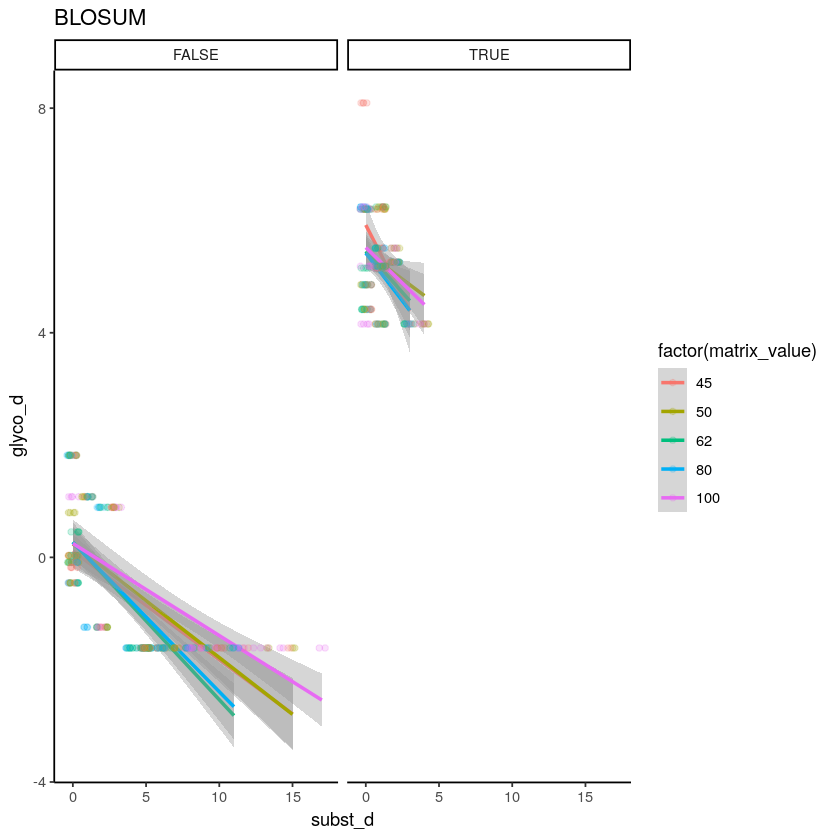

In [48]:
# ggplot(m[m$v2_type=='aa' & m$subst_d>=0,],aes(x=factor(subst_d),y=glyco_d,color=factor(matrix_value)))+
#     geom_boxplot(outlier.shape = NA)+geom_jitter(alpha=.2)+facet_grid(v2_type~matrix_type)+
#     theme_classic()

ggplot(m[m$v2_type=='aa' & m$subst_d>=(0) & m$matrix_type=='PAM',],aes(x=subst_d,y=glyco_d,color=factor(matrix_value)))+
    stat_smooth(method='glm')+geom_jitter(alpha=.2)+facet_grid(~glyco_d>glyco_d_thresh,scale='free_y')+ggtitle('PAM')+
    theme_classic()

ggplot(m[m$v2_type=='aa' & m$subst_d>=(0) & m$matrix_type=='BLOSUM',],aes(x=subst_d,y=glyco_d,color=factor(matrix_value)))+
    stat_smooth(method='glm')+geom_jitter(alpha=.2)+facet_grid(~glyco_d>glyco_d_thresh,scale='free_y')+ggtitle('BLOSUM')+
    theme_classic()

# ggplot(m[m$subst_d>=0,],aes(x=factor(subst_d),y=glyco_d,color=matrix_value))+
#     facet_grid(matrix_value~matrix_type)+geom_boxplot()

## can we explain the difference between PAM (functional, global alignment of the same proteins) and BLOSUM (structural, local alignment of divergent proteins) using glyco impact distance?

#### on the difference between pam and blosum: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3848038/

In [49]:
head(subst_d)
cbx

Var1,Var2,subst_d,L1,matrix_type,matrix_value
<fct>,<fct>,<int>,<chr>,<fct>,<dbl>
A,A,5,BLOSUM_45,BLOSUM,45
R,A,-2,BLOSUM_45,BLOSUM,45
N,A,-1,BLOSUM_45,BLOSUM,45
D,A,-2,BLOSUM_45,BLOSUM,45
C,A,-1,BLOSUM_45,BLOSUM,45
Q,A,-1,BLOSUM_45,BLOSUM,45


BLOSUM_45,BLOSUM_45,BLOSUM_45,BLOSUM_45,BLOSUM_45,BLOSUM_45,BLOSUM_45,BLOSUM_45,BLOSUM_45,BLOSUM_50,⋯,PAM_30,PAM_30,PAM_30,PAM_30,PAM_40,PAM_40,PAM_40,PAM_70,PAM_70,PAM_120
BLOSUM_50,BLOSUM_62,BLOSUM_80,BLOSUM_100,PAM_30,PAM_40,PAM_70,PAM_120,PAM_250,BLOSUM_62,⋯,PAM_40,PAM_70,PAM_120,PAM_250,PAM_70,PAM_120,PAM_250,PAM_120,PAM_250,PAM_250


NULL

NULL

Var1,Var2,matrix_value_rank,subst_d.x,L1.x,matrix_type.x,matrix_value.x,subst_d.y,L1.y,matrix_type.y,matrix_value.y
<fct>,<fct>,<dbl>,<int>,<chr>,<fct>,<dbl>,<int>,<chr>,<fct>,<dbl>
*,*,1,1,BLOSUM_100,BLOSUM,100,1,PAM_30,PAM,30
*,*,2,1,BLOSUM_80,BLOSUM,80,1,PAM_40,PAM,40
*,*,3,1,BLOSUM_62,BLOSUM,62,1,PAM_70,PAM,70
*,*,4,1,BLOSUM_50,BLOSUM,50,1,PAM_120,PAM,120
*,*,5,1,BLOSUM_45,BLOSUM,45,1,PAM_250,PAM,250
*,A,1,-10,BLOSUM_100,BLOSUM,100,-17,PAM_30,PAM,30
*,A,2,-6,BLOSUM_80,BLOSUM,80,-15,PAM_40,PAM,40
*,A,3,-4,BLOSUM_62,BLOSUM,62,-11,PAM_70,PAM,70
*,A,4,-5,BLOSUM_50,BLOSUM,50,-8,PAM_120,PAM,120


Var1,Var2,glyco_d,v2_type,matrix_value_rank,subst_d.x,L1.x,matrix_type.x,matrix_value.x,subst_d.y,L1.y,matrix_type.y,matrix_value.y
<fct>,<fct>,<dbl>,<fct>,<dbl>,<int>,<chr>,<fct>,<dbl>,<int>,<chr>,<fct>,<dbl>
A,A,-1.612986,aa,1,8,BLOSUM_100,BLOSUM,100,6,PAM_30,PAM,30
A,A,-1.612986,aa,2,5,BLOSUM_80,BLOSUM,80,6,PAM_40,PAM,40
A,A,-1.612986,aa,5,5,BLOSUM_45,BLOSUM,45,2,PAM_250,PAM,250
A,A,-1.612986,aa,3,4,BLOSUM_62,BLOSUM,62,5,PAM_70,PAM,70
A,A,-1.612986,aa,4,5,BLOSUM_50,BLOSUM,50,3,PAM_120,PAM,120
A,A,-1.965403,aaAll,1,8,BLOSUM_100,BLOSUM,100,6,PAM_30,PAM,30



Call:
glm(formula = subst_d.y ~ subst_d.x + glyco_d, data = di)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-8.938  -1.204   0.447   1.668   4.563  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.23453    0.42541   2.902  0.00382 ** 
subst_d.x    1.40646    0.03824  36.779  < 2e-16 ***
glyco_d     -0.49357    0.07662  -6.442 2.17e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 5.243808)

    Null deviance: 11707.4  on 719  degrees of freedom
Residual deviance:  3759.8  on 717  degrees of freedom
AIC: 3241.3

Number of Fisher Scoring iterations: 2


Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
718,3977.401,NA,NA,NA
717,3759.810,1,217.5903,1.181898e-10



Call:
glm(formula = subst_d.y ~ subst_d.x + glyco_d, data = di)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-9.1849  -1.3776   0.4344   1.8128   7.7105  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.51189    0.07397 -20.439  < 2e-16 ***
subst_d.x    1.17591    0.01756  66.980  < 2e-16 ***
glyco_d     -0.09225    0.02071  -4.454 8.92e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 6.666018)

    Null deviance: 44709  on 1959  degrees of freedom
Residual deviance: 13045  on 1957  degrees of freedom
AIC: 9285.4

Number of Fisher Scoring iterations: 2


Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1958,13177.61,NA,NA,NA
1957,13045.40,1,132.2156,8.445492e-06


`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


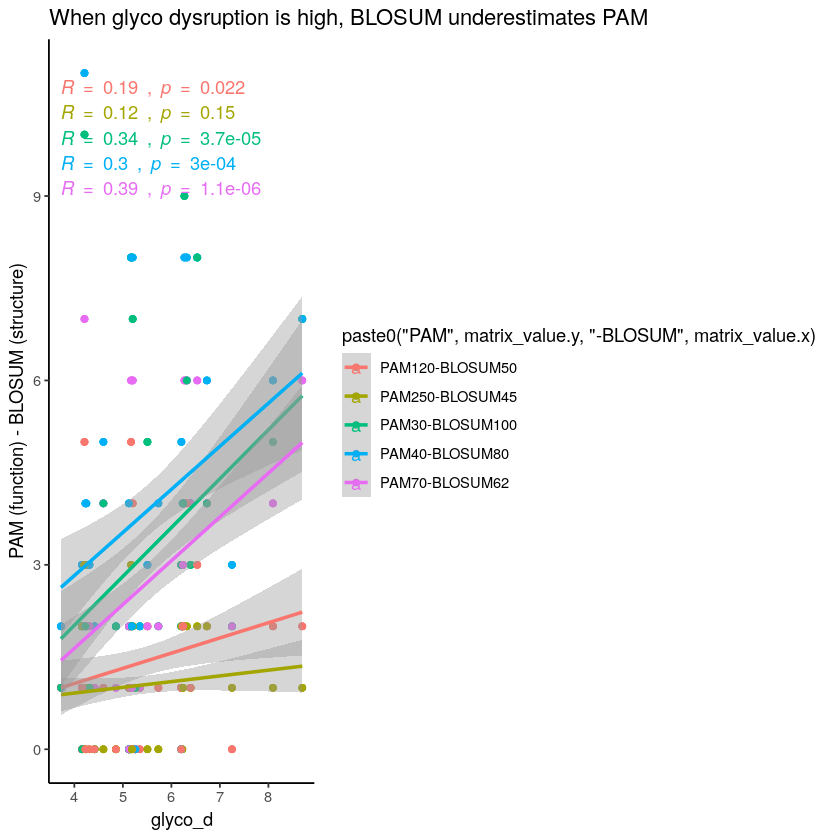

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


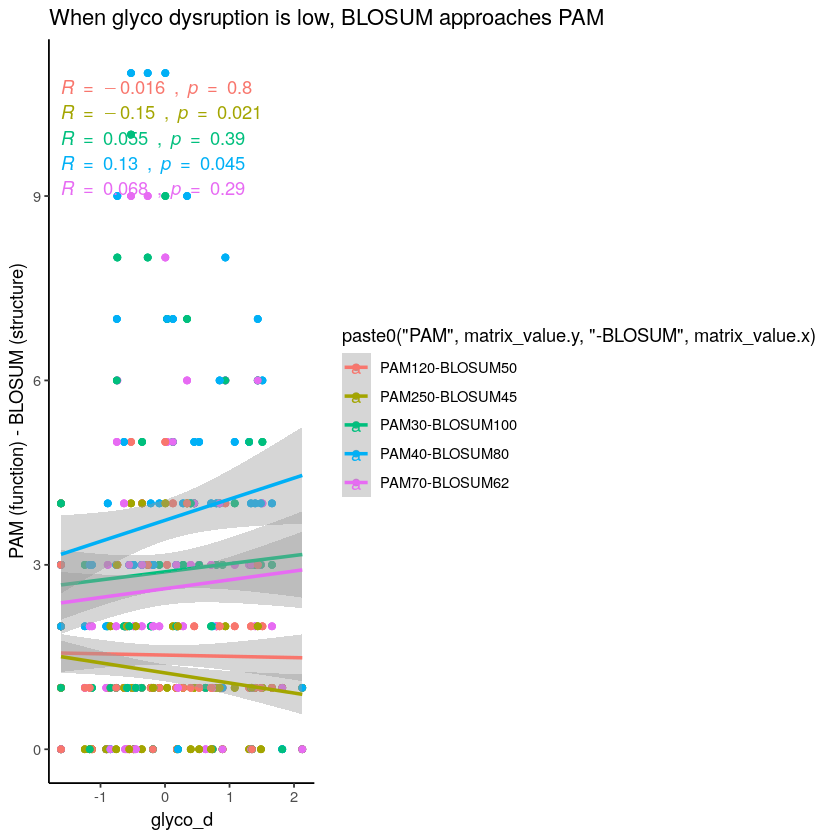

Saving 6.67 x 6.67 in image
`geom_smooth()` using formula 'y ~ x'
Saving 6.67 x 6.67 in image
`geom_smooth()` using formula 'y ~ x'
Saving 6.67 x 6.67 in image
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


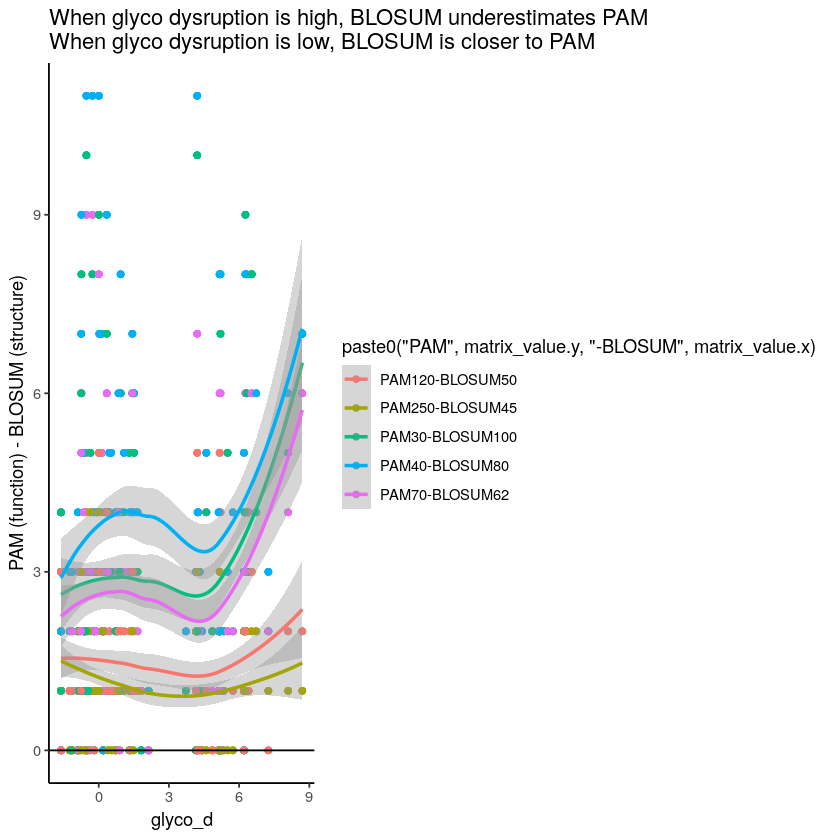

In [55]:
library(ggpubr)

## split
subst_d_p = subst_d[subst_d$matrix_type=='PAM',]
subst_d_p$matrix_value_rank = as.numeric(factor((subst_d_p$matrix_value),
                                                levels=sort(unique((subst_d_p$matrix_value)),decreasing = F)))
subst_d_b = subst_d[subst_d$matrix_type=='BLOSUM',]
subst_d_b$matrix_value_rank = as.numeric(factor((subst_d_b$matrix_value),
                                                levels=sort(unique((subst_d_b$matrix_value)),decreasing = T)))
levels(subst_d_p$matrix_value_rank)
levels(subst_d_b$matrix_value_rank)

subst_d2 = merge(subst_d_b,subst_d_p,by=c('Var1','Var2','matrix_value_rank'))
head(subst_d2,n=10)
m2<-merge(glyco_d,subst_d2)
head(m2)


di = m2[m2$v2_type=='aa' & m2$glyco_d>glyco_d_thresh,]
mod0 = glm(subst_d.y ~ subst_d.x,data=di)
mod1 = glm(subst_d.y ~ subst_d.x+glyco_d,data=di)
summary(mod1)
anova(mod0,mod1,test='LRT')

g1=ggplot(m2[m2$v2_type=='aa' & m2$glyco_d>glyco_d_thresh,],
       aes(x=glyco_d,y=sqrt((subst_d.y-subst_d.x)^2),color=paste0('PAM',matrix_value.y,'-BLOSUM',matrix_value.x))) +geom_point()+stat_smooth(method='glm')+
        theme_classic()+stat_cor(method='pearson')+
        ylab('PAM (function) - BLOSUM (structure)')+ggtitle('When glyco dysruption is high, BLOSUM underestimates PAM')

di = m2[m2$v2_type=='aa' & m2$glyco_d<20,]
mod0 = glm(subst_d.y ~ subst_d.x,data=di)
mod1 = glm(subst_d.y ~ subst_d.x+glyco_d,data=di)
summary(mod1)
anova(mod0,mod1,test='LRT')

g2=ggplot(m2[m2$v2_type=='aa' & m2$glyco_d<glyco_d_thresh,],
       aes(x=glyco_d,y=sqrt((subst_d.y-subst_d.x)^2),color=paste0('PAM',matrix_value.y,'-BLOSUM',matrix_value.x))) +geom_point()+stat_smooth(method='glm')+
        theme_classic()+stat_cor(method='pearson')+
        ylab('PAM (function) - BLOSUM (structure)')+ggtitle('When glyco dysruption is low, BLOSUM approaches PAM')

g3=ggplot(m2[m2$v2_type=='aa',],
       aes(x=glyco_d,y=sqrt((subst_d.y-subst_d.x)^2),color=paste0('PAM',matrix_value.y,'-BLOSUM',matrix_value.x))) +
        geom_point()+stat_smooth(span=1)+geom_hline(yintercept = 0)+theme_classic()+
        ylab('PAM (function) - BLOSUM (structure)')+
        ggtitle('When glyco dysruption is high, BLOSUM underestimates PAM \nWhen glyco dysruption is low, BLOSUM is closer to PAM')

g1
g2
g3

ggsave(g1,filename='figures/03.statistical_trends//glyco_distance/PAMvBLOSUM.high.pdf')
ggsave(g2,filename='figures/03.statistical_trends//glyco_distance/PAMvBLOSUM.low.pdf')
ggsave(g3,filename='figures/03.statistical_trends//glyco_distance/PAMvBLOSUM.both.pdf')


In [53]:
cbx = combn(unique(subst_d$L1),2,)
subst_d2 = do.call(rbind,apply(cbind(cbx,cbx[2:1,]),2,function(x){
    subst_d1 = subst_d[subst_d$L1==x[1],]
    subst_d2 = subst_d[subst_d$L1==x[2],]
    subst_out = merge(subst_d1,subst_d2,by=c('Var1','Var2'))
}))
m2 = merge(glyco_d[glyco_d$v2_type=='aa',],subst_d2)

m2$matrix_type = with(m2,paste(as.character(matrix_type.x),as.character(matrix_type.y)))
m2$high_gscore = m2$glyco_d>glyco_d_thresh 

str(m2)

m2$L1.x = factor(m2$L1.x,levels=gsub('.*_','',levels(m2$L1.x)))
head(m2)
                   

'data.frame':	35280 obs. of  14 variables:
 $ Var1          : Factor w/ 18 levels "A","C","D","E",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Var2          : Factor w/ 18 levels "A","C","D","E",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ glyco_d       : num  -1.61 -1.61 -1.61 -1.61 -1.61 ...
 $ v2_type       : Factor w/ 4 levels "aa","aaAll","aaDown",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ subst_d.x     : int  5 5 5 5 6 8 8 8 5 3 ...
 $ L1.x          : chr  "PAM_70" "BLOSUM_50" "PAM_70" "BLOSUM_80" ...
 $ matrix_type.x : Factor w/ 2 levels "BLOSUM","PAM": 2 1 2 1 2 1 1 1 1 2 ...
 $ matrix_value.x: num  70 50 70 80 40 100 100 100 50 120 ...
 $ subst_d.y     : int  4 6 5 6 8 5 5 5 4 2 ...
 $ L1.y          : chr  "BLOSUM_62" "PAM_40" "BLOSUM_80" "PAM_30" ...
 $ matrix_type.y : Factor w/ 2 levels "BLOSUM","PAM": 1 2 1 2 1 2 1 1 1 2 ...
 $ matrix_value.y: num  62 40 80 30 100 70 80 45 62 250 ...
 $ matrix_type   : chr  "PAM BLOSUM" "BLOSUM PAM" "PAM BLOSUM" "BLOSUM PAM" ...
 $ high_gscore   : logi  FALSE FALSE FALSE FALSE FA

Var1,Var2,glyco_d,v2_type,subst_d.x,L1.x,matrix_type.x,matrix_value.x,subst_d.y,L1.y,matrix_type.y,matrix_value.y,matrix_type,high_gscore
<fct>,<fct>,<dbl>,<fct>,<int>,<fct>,<fct>,<dbl>,<int>,<chr>,<fct>,<dbl>,<chr>,<lgl>
A,A,-1.612986,aa,5,NA,PAM,70,4,BLOSUM_62,BLOSUM,62,PAM BLOSUM,FALSE
A,A,-1.612986,aa,5,NA,BLOSUM,50,6,PAM_40,PAM,40,BLOSUM PAM,FALSE
A,A,-1.612986,aa,5,NA,PAM,70,5,BLOSUM_80,BLOSUM,80,PAM BLOSUM,FALSE
A,A,-1.612986,aa,5,NA,BLOSUM,80,6,PAM_30,PAM,30,BLOSUM PAM,FALSE
A,A,-1.612986,aa,6,NA,PAM,40,8,BLOSUM_100,BLOSUM,100,PAM BLOSUM,FALSE
A,A,-1.612986,aa,8,NA,BLOSUM,100,5,PAM_70,PAM,70,BLOSUM PAM,FALSE


`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


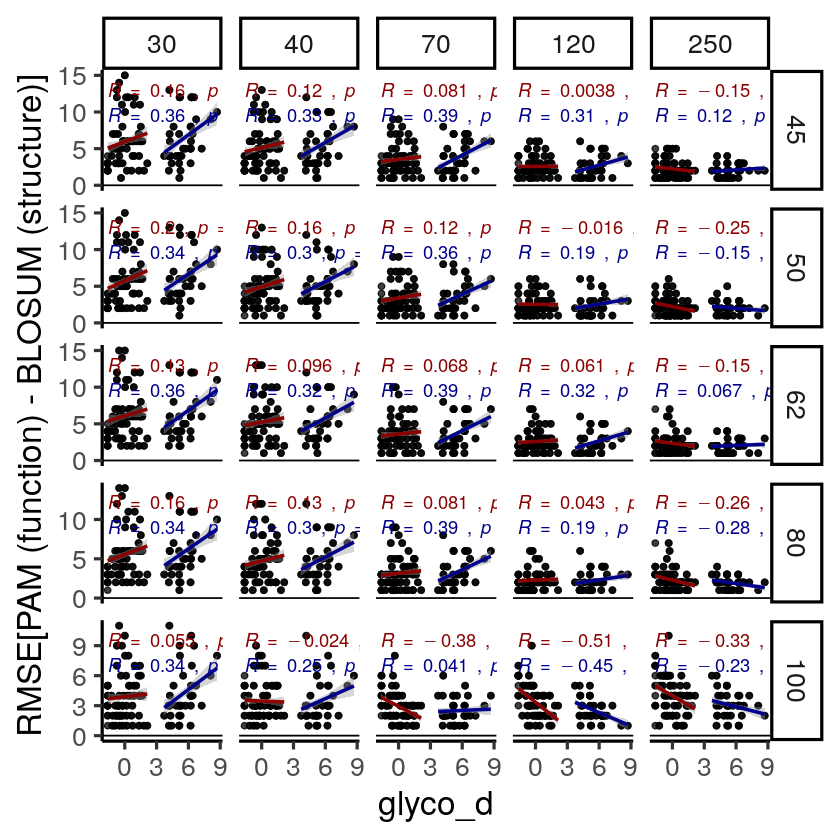

In [54]:
library(ggpubr)
tmp=lapply(unique(m2$matrix_type),function(x){
g=ggplot(m2[m2$v2_type=='aa' & m2$matrix_type==x,],
       aes(x=glyco_d,y=sqrt((subst_d.y-subst_d.x)^2),color=paste0(matrix_type.y,matrix_value.y,matrix_type.x,matrix_value.x))) +
        geom_point()+stat_smooth(method='glm')+geom_hline(yintercept = 0)+theme_classic()+
        facet_wrap(~high_gscore,scales = 'free')+
        ylab('PAM (function) - BLOSUM (structure)')+labs(color='matrixes')
        #ggtitle('When glyco dysruption is high, BLOSUM underestimates PAM \nWhen glyco dysruption is low, BLOSUM is closer to PAM')
    
g2=ggplot(m2[m2$v2_type=='aa' & m2$matrix_type==x ,],
       aes(x=glyco_d,y=1+sqrt((subst_d.y-subst_d.x)^2),color=high_gscore))+ #,color=paste0(matrix_type.y,matrix_value.y,matrix_type.x,matrix_value.x))) +
        geom_point(alpha=.5,color='black')+stat_smooth(method='glm')+geom_hline(yintercept = 0)+theme_classic(base_size = 20)+theme(legend.position = 'none')+
        facet_grid(matrix_value.y~matrix_value.x,scales = 'free')+stat_cor(method = "pearson")+ #,label.sep = "\n")+#scale_y_log10()+
        ylab('RMSE[PAM (function) - BLOSUM (structure)]')+labs(color='matrixes')+
        scale_color_manual(values = c('darkred','darkblue'))
        #ggtitle('When glyco dysruption is high, BLOSUM underestimates PAM \nWhen glyco dysruption is low, BLOSUM is closer to PAM')
list(g,g2)
})
g=tmp[[1]][[2]]
g
ggsave(g,filename='figures/03.statistical_trends//glyco_distance/PAMvBLOSUM.all.pdf',height=20,width=20)
#tmp[[2]][[2]]
#tmp[[3]][[2]]


# tmp[[2]]
# tmp[[3]]


Call:
glm(formula = subst_d.y ~ subst_d.x + glyco_d, data = di)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-11.9202   -1.4950    0.5138    1.9880    7.6825  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.368689   0.290392   4.713 2.51e-06 ***
subst_d.x    0.651551   0.013908  46.847  < 2e-16 ***
glyco_d     -0.100050   0.009583 -10.440  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 8.627537)

    Null deviance: 60897  on 4589  degrees of freedom
Residual deviance: 39575  on 4587  degrees of freedom
AIC: 22922

Number of Fisher Scoring iterations: 2


Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4588,40514.87,NA,NA,NA
4587,39574.51,1,940.3515,1.627616e-25


ERROR while rich displaying an object: Error in factor(matrix_value_rank): object 'matrix_value_rank' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.def


Call:
glm(formula = subst_d.y ~ subst_d.x + glyco_d, data = di)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-13.4262   -1.6183    0.5958    2.0665    7.8885  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.732559   0.068471  -39.91   <2e-16 ***
subst_d.x    0.514105   0.009895   51.96   <2e-16 ***
glyco_d      0.087108   0.007580   11.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 8.831004)

    Null deviance: 122962  on 10799  degrees of freedom
Residual deviance:  95348  on 10797  degrees of freedom
AIC: 54179

Number of Fisher Scoring iterations: 2


Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10798,96514.66,NA,NA,NA
10797,95348.35,1,1166.31,1.444373e-30


ERROR while rich displaying an object: Error in factor(matrix_value_rank): object 'matrix_value_rank' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.def

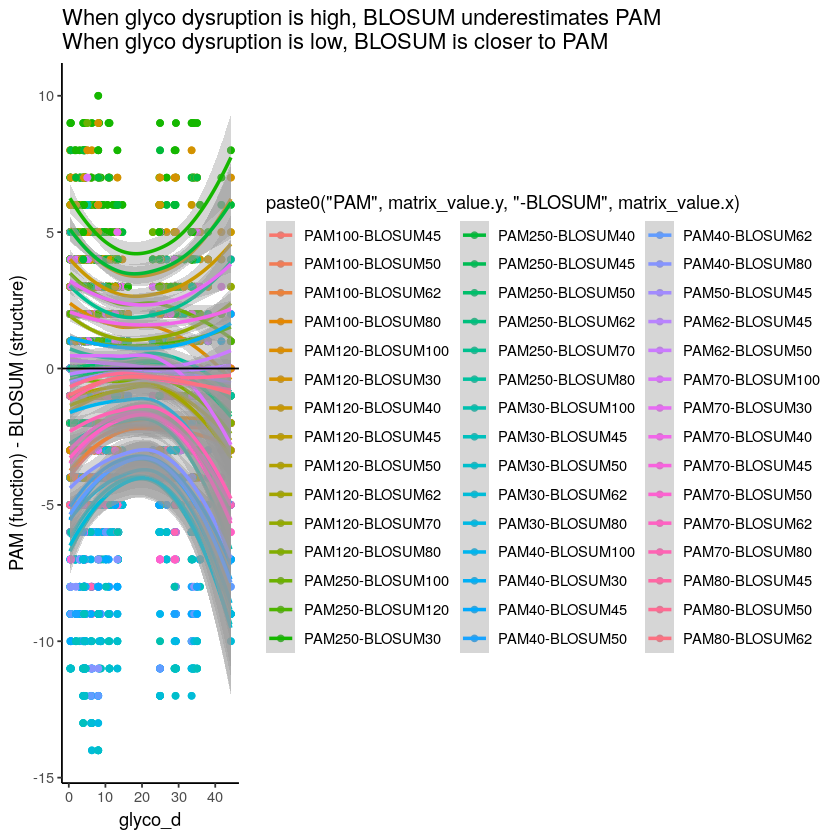

In [39]:

di = m2[m2$v2_type=='aa' & m2$glyco_d>20,]
mod0 = glm(subst_d.y ~ subst_d.x,data=di)
mod1 = glm(subst_d.y ~ subst_d.x+glyco_d,data=di)
summary(mod1)
anova(mod0,mod1,test='LRT')

ggplot(m2[m2$v2_type=='aa' & m2$glyco_d>20,],
       aes(x=glyco_d,y=subst_d.y-subst_d.x,color=factor(matrix_value_rank))) +geom_point()+stat_smooth(method='glm')+
        theme_classic()+
        ylab('PAM (function) - BLOSUM (structure)')+ggtitle('When glyco dysruption is high, BLOSUM underestimates PAM')

di = m2[m2$v2_type=='aa' & m2$glyco_d<20,]
mod0 = glm(subst_d.y ~ subst_d.x,data=di)
mod1 = glm(subst_d.y ~ subst_d.x+glyco_d,data=di)
summary(mod1)
anova(mod0,mod1,test='LRT')

ggplot(m2[m2$v2_type=='aa' & m2$glyco_d<20,],
       aes(x=glyco_d,y=subst_d.y-subst_d.x,color=factor(matrix_value_rank))) +geom_point()+stat_smooth(method='glm')+
        theme_classic()+
        ylab('PAM (function) - BLOSUM (structure)')+ggtitle('When glyco dysruption is low, BLOSUM approaches PAM')

ggplot(m2[m2$v2_type=='aa',],
       aes(x=glyco_d,y=subst_d.y-subst_d.x,color=paste0('PAM',matrix_value.y,'-BLOSUM',matrix_value.x))) +
        geom_point()+stat_smooth(span=1)+geom_hline(yintercept = 0)+theme_classic()+
        ylab('PAM (function) - BLOSUM (structure)')+
        ggtitle('When glyco dysruption is high, BLOSUM underestimates PAM \nWhen glyco dysruption is low, BLOSUM is closer to PAM')


In [ ]:

# ggplot(m2[m2$v2_type=='aa' & m2$glyco_d<20,],
#        aes(x=subst_d.y,y=subst_d.x,color=glyco_d)) +geom_point()+stat_smooth(method='glm')+
#         theme_classic()+
#         ylab('PAM (function) - BLOSUM (structure)')+ggtitle('When glyco dysruption is low, BLOSUM approaches PAM')

# ggplot(m2[m2$v2_type=='aa',],
#        aes(x=subst_d.y,y=subst_d.x,color=glyco_d)) +geom_point()+stat_smooth(method='glm')+
#         geom_point()+stat_smooth(span=1)+geom_hline(yintercept = 0)+theme_classic()+
#         ylab('PAM (function) - BLOSUM (structure)')+
#         ggtitle('When glyco dysruption is high, BLOSUM underestimates PAM \nWhen glyco dysruption is low, BLOSUM is closer to PAM')


In [143]:
library('plot3D')

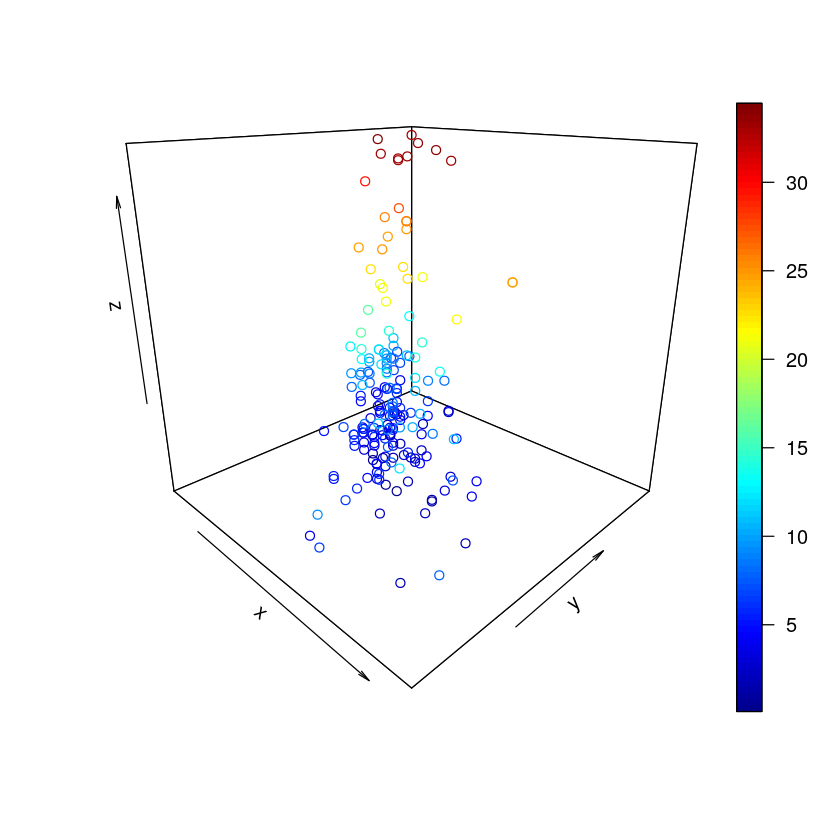

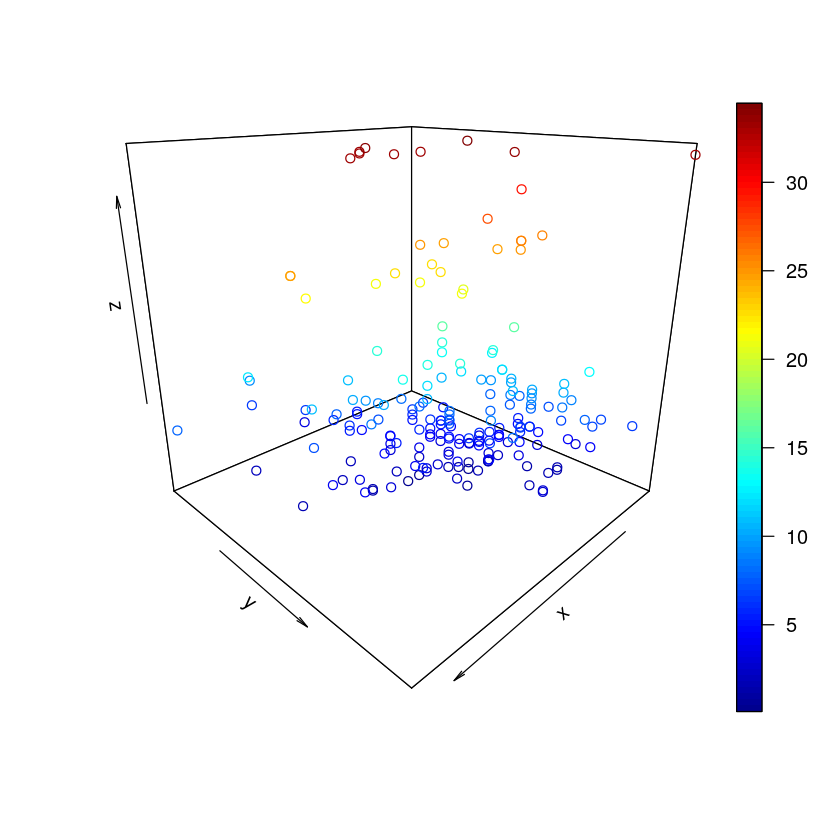

In [171]:

# ggplot(m2[m2$v2_type=='aa' & m2$glyco_d<20,],
#        aes(x=subst_d.y,y=subst_d.x,color=glyco_d)) +geom_point()+stat_smooth(method='glm')+
#         theme_classic()+
#         ylab('PAM (function) - BLOSUM (structure)')+ggtitle('When glyco dysruption is low, BLOSUM approaches PAM')

# ggplot(m2[m2$v2_type=='aa',],
#        aes(x=subst_d.y,y=subst_d.x,color=glyco_d)) +geom_point()+stat_smooth(method='glm')+
#         geom_point()+stat_smooth(span=1)+geom_hline(yintercept = 0)+theme_classic()+
#         ylab('PAM (function) - BLOSUM (structure)')+
#         ggtitle('When glyco dysruption is high, BLOSUM underestimates PAM \nWhen glyco dysruption is low, BLOSUM is closer to PAM')

x=-m2$subst_d.y[idx<-sample(1:nrow(m2),2e2)]
y=m2$subst_d.x[idx]
z=m2$glyco_d[idx]
M <- mesh(x, y, z)
R <- with (M, sqrt(x^2 + y^2 +z^2))
p <- sin(2*R)/(R+1e-3)
# slice3D(x, y, z, colvar = p,
#     xs = 0, ys = c(-4, 0, 4), zs = NULL)

scatter3D(x,y,z,phi=20,theta=45)
scatter3D(x,y,z,phi=20,theta=90+45)

# isosurf3D(x=m2$subst_d.y, y=m2$subst_d.x, z=m2$glyco_d, #colvar=m2$glyco_d, 
#     xs = 0, ys = c(-4, 0, 4), zs = NULL)

In [160]:
gc(reset=T)

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,3701682,197.7,6953791,371.4,3701682,197.7
Vcells,4008794879,30584.7,6015049250,45891.2,4008794879,30584.7
